<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и выберите ответы в [веб-форме](https://docs.google.com/forms/d/1exliJqAEZeBFewbiLT6nFGFU_ICAsUMtrJUMXF1-WNg/edit).**

In [3]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 10

## Загрузка и знакомство с данными

Для работы вам понадобятся данные из нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). Файл **`howpop_train.csv`** уже лежит в нашем репозитории в каталоге **`data`**, но его можно скачать и с Kaggle.

In [4]:
df = pd.read_csv('../data/howpop_train.csv')

In [5]:
df.shape

(134137, 17)

In [6]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [7]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [9]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/post/245642/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [10]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [11]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [12]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016,
* **<font color = 'green'>март 2015<font\>**,
* апрель 2015,
* апрель 2016.

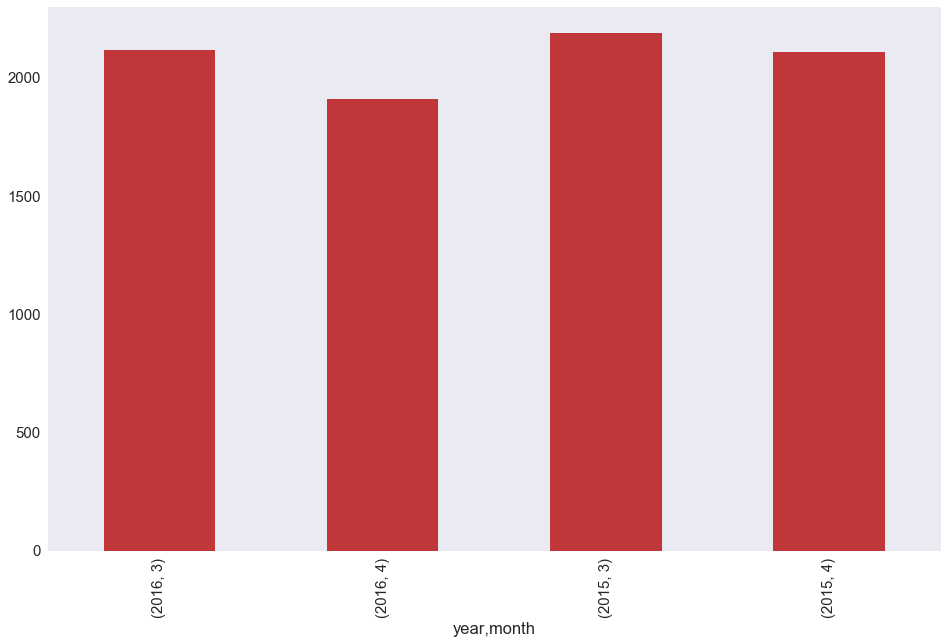

In [13]:
df.groupby(['year'])['month'].value_counts()[[(2016, 3), (2016, 4), (2015, 3), (2015, 4)]].plot(kind='bar')

In [14]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [15]:
publications = pd.crosstab(df.month, df.year)
data=[]
for year in publications.columns:
    data.append(go.Scatter(x=publications.index, y=publications[year], name=year))
layout={'title':'When were the articles published'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

## 2\. Проанализируйте публикации в этом месяце (из вопроса 1)

Выберите один или несколько вариантов:

* **<font color = 'green'>На графике не заметны какие-либо выбросы или аномалии,<font\>**
* Один или несколько дней сильно выделяются из общей картины,
* На хабре _всегда_ больше статей, чем на гиктаймсе,
* **<font color = 'green'>По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.<font\>**

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`

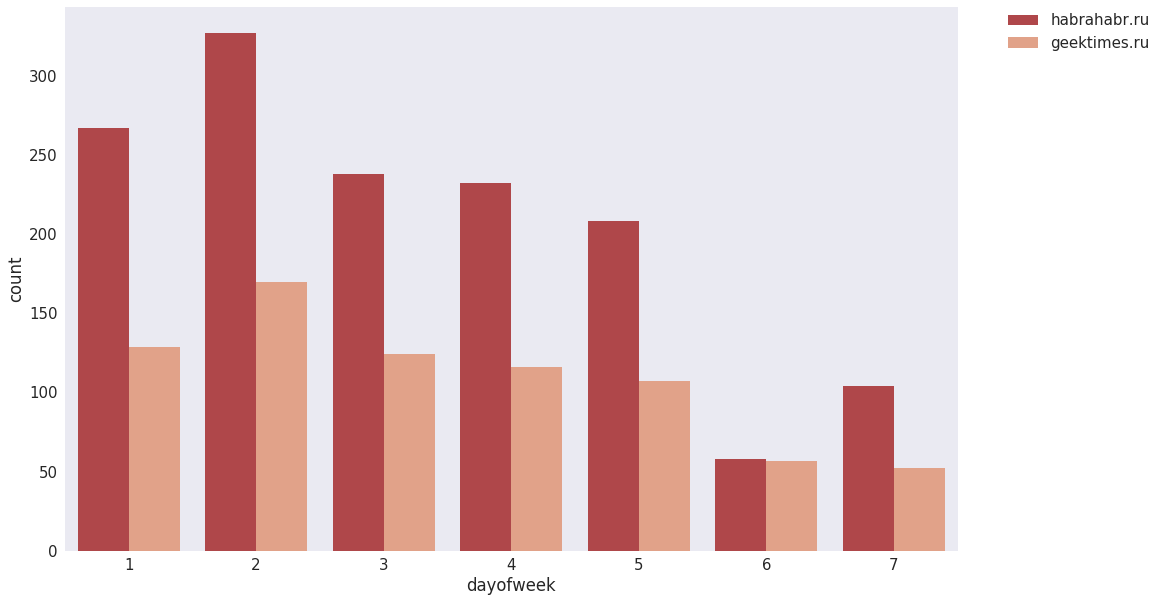

In [16]:
df0315 = df[df.year == 2015][df.month == 3]

sns.countplot(x='dayofweek', hue='domain', data=df0315);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

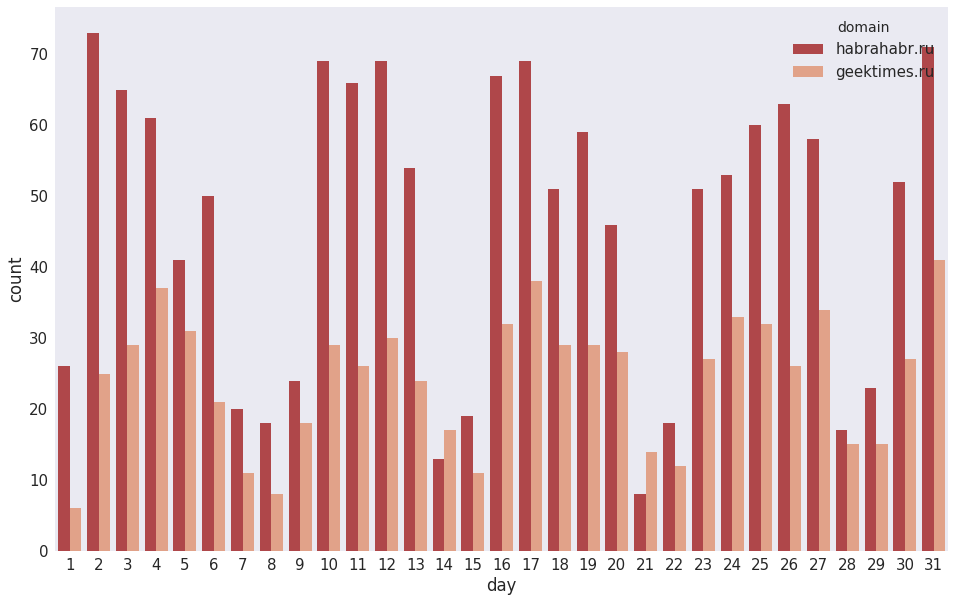

In [18]:
df0315['day'] = [p.day for p in df0315.published]
sns.countplot(x = 'day', hue = 'domain', data = df0315)

## 3\. Выберите верное утверждение

* Больше всего просмотров (в среднем) набирают статьи, опубликованные в 12 часов дня;
* У опубликованных в 10 утра постов больше всего комментариев  (в среднем);
* **<font clolr = 'green'>Больше всего просмотров  (в среднем) набирают статьи, опубликованные в 6 часов утра;<font>\**
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;
* На хабре дневные статьи комментируют чаще  (в среднем), чем вечерние

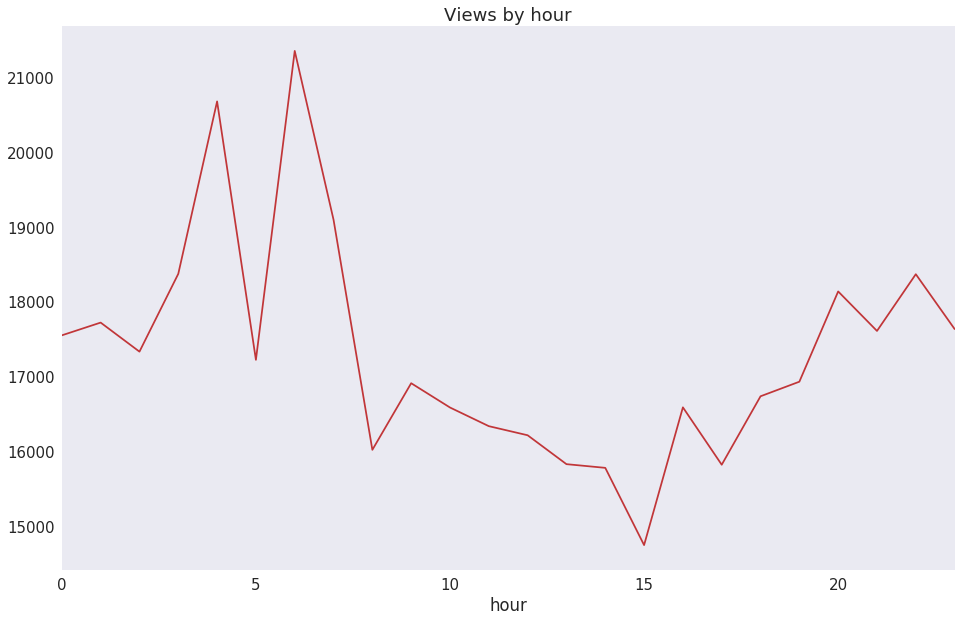

In [23]:
df.groupby('hour')['views'].mean().plot(title = 'Views by hour');

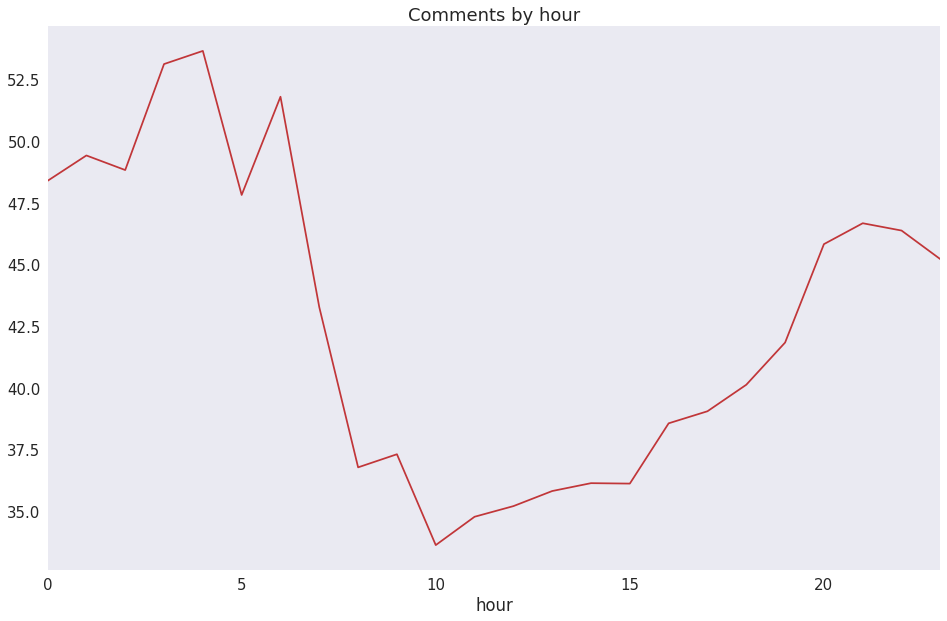

In [21]:
df.groupby('hour')['comments'].mean().plot(title = 'Comments by hour');

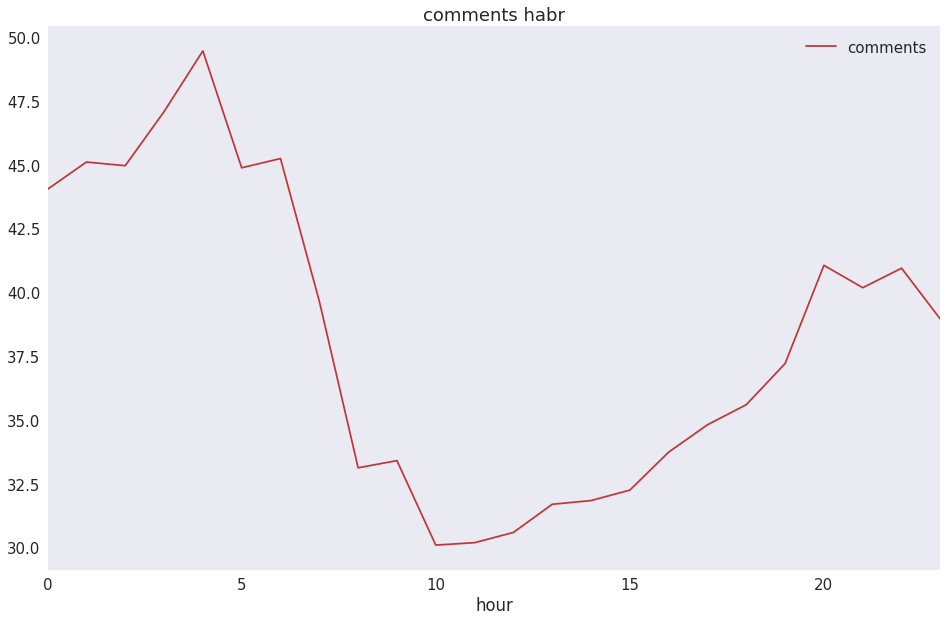

In [24]:
df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot(title = "Comments by hour habr");

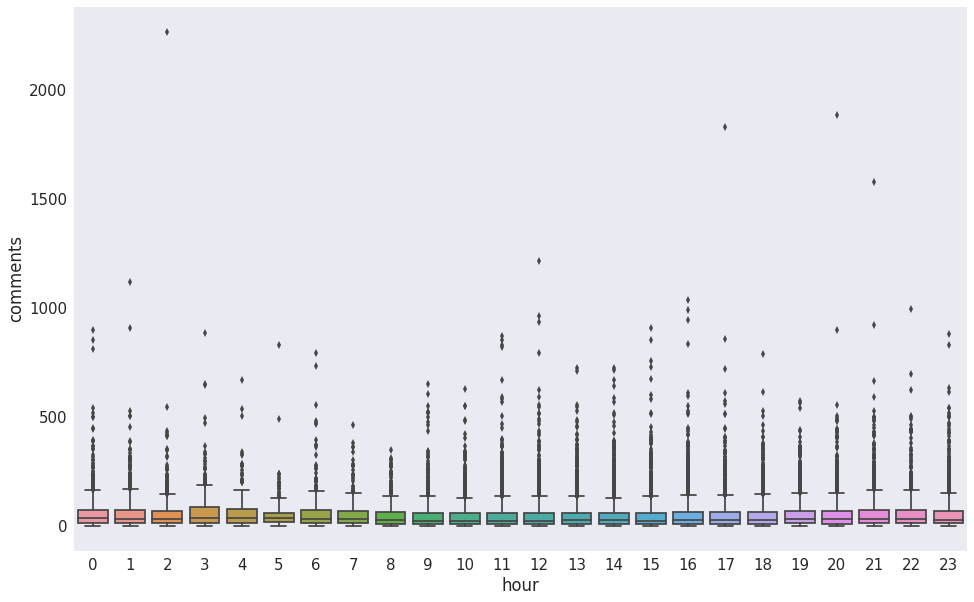

In [29]:
sns.boxplot(x='hour', y='comments', data=df[df.domain=='geektimes.ru'])

## 4\. Кого из топ-20 авторов (по числу статей) чаще всего минусуют (в среднем)?

* @Mordatyj
* **<font color = 'green'>@Mithgol<font\>**
* @alizar
* @ilya42

In [108]:
top_20 = df['author'].value_counts()[:20].index.values

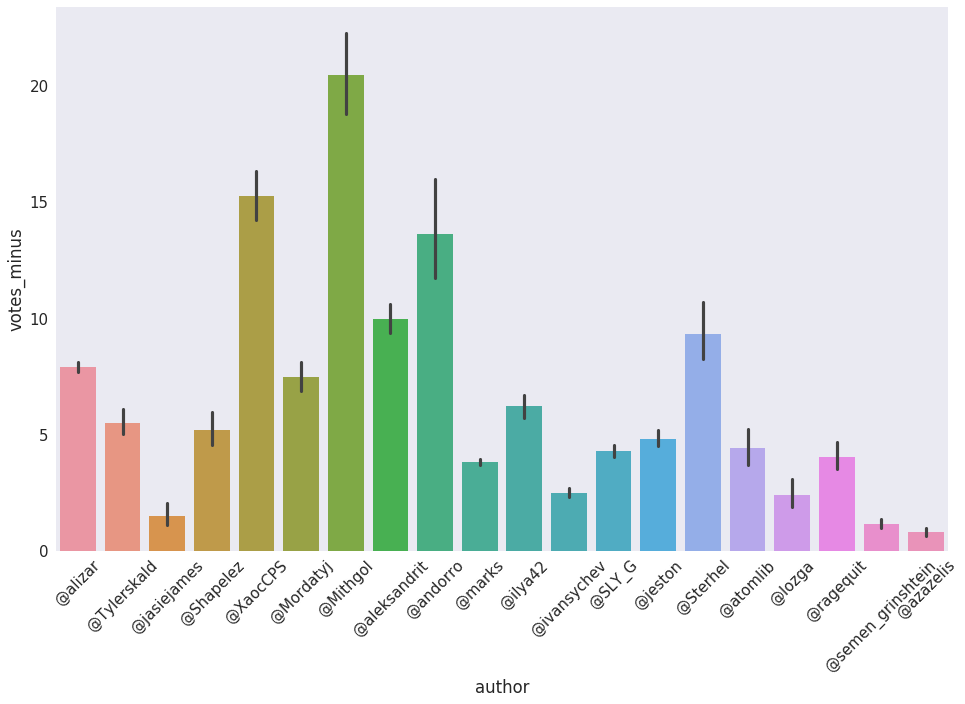

In [110]:
plot = sns.barplot(x = 'author', y = 'votes_minus', data = df[df['author'].isin(top_20)])
for item in plot.get_xticklabels():
    item.set_rotation(45)

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером? **НЕТ**

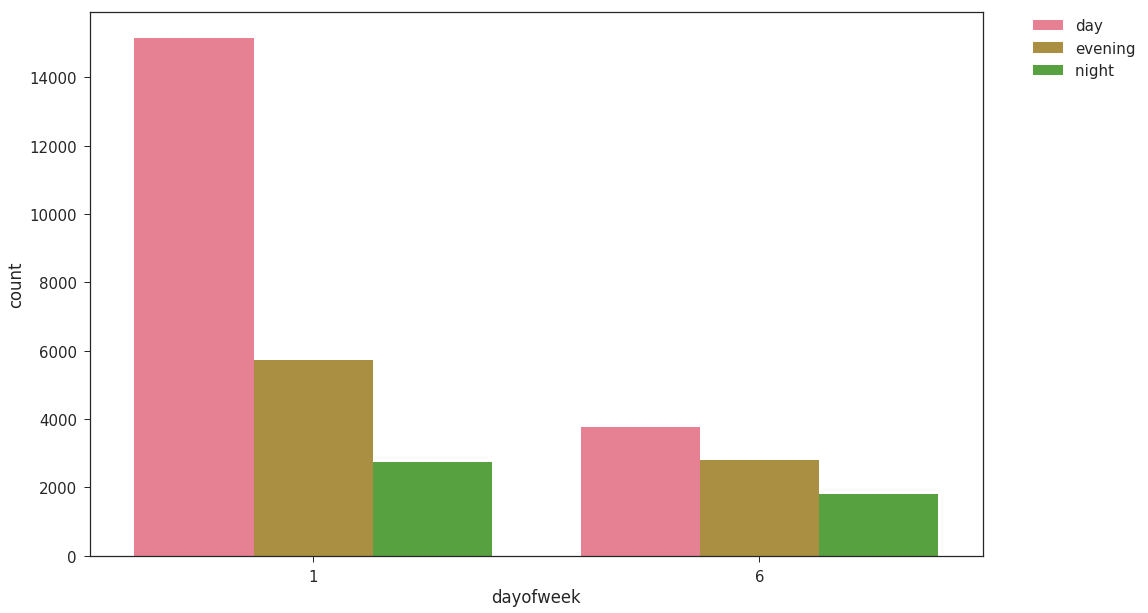

In [123]:
df['daytime'] = df.hour.map(lambda x : 'day' if x > 8 and x < 18 else  'evening' if x >17 and x <=24 else'night '  )
sns.set_style('ticks')
sns.set_palette('husl')
sns.countplot(x = 'dayofweek', hue = 'daytime', data = df[df.dayofweek.isin([1,6])] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)